# Лабораторная работа 1, ПМИ 2023/24, I курс, M+, дискретная математика.

Это небольшой ознакомительный туториал по библиотеке [NetworkX](https://networkx.org). Каждая задача оценивается в $2.5$ балла, за №3 и №4 можно получить по одному дополнительному. Таким образом, за выполнение этого ноутбука можно получить до $12$ баллов.

При решении задач можно и __нужно__ использовать любую функциональность библиотеки NetworkX. Однако использование сторонних библиотек, кроме NetworkX и matplotlib, запрещено.

Удачи!

## №0. Играемся с NetworkX ($0$ баллов)

NetworkX — это библиотека для работы с графами и базирующихся на них структурами. У библиотеки есть замечательная документация и оффициальные туториалы на [сайте библиотеки](networkx.org), не забывайте заглядывать в них при выполнении лабораторной работы.

Наш основной подопытный в этом ноутбуке — класс [`Graph`](https://networkx.org/documentation/stable/reference/classes/graph.html), предназначенный для работы с неориентированными графами без кратных ребер. Вершинами графов могут быть любые хешируемые объекты, кроме `None`. С каждой вершиной и ребром также ассоциирован словарь произвольных атрибутов.

In [ ]:
# не забываем импортировать библиотеку
import networkx as nx

In [ ]:
G = nx.Graph()  # создаем пустой граф

G.add_nodes_from(range(10))  # добавляем в граф вершины: числа от 0 до 9
G.add_nodes_from(["odd", "even"])  # добавляем еще две вершины-строки

for int_node in range(10):
    # добавляем ребра, которые хранят какую-то информацию
    G.add_edge(int_node, "odd" if int_node % 2 == 1 else "even", quotient=int_node // 2)

print(G)

# G.nodes — список вершин графа
# обратите внимание, что это не питоновский список, а специальный прокси-объект
# в частности, при обращении к G.nodes ничего не копируется
print(f"{G.nodes = }")

# G.edges — список ребер
# Как и в случае в вершинами, G.nodes — это прокси-объект

# По умолчанию edges представляет только набор ребер
print(f"{G.edges = }")

# Можно указать, чтобы edges еще показывал хранимые в ребрах данные
print(f"{G.edges(data=True) = }")

# Можно попросить только ребра, инцидентные какой-то вершине
print(f"{G.edges(nbunch='odd') = }")

# См. также: Graph.degree, Graph.adj

Graph with 12 nodes and 10 edges
G.nodes = NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'odd', 'even'))
G.edges = EdgeView([(0, 'even'), (1, 'odd'), (2, 'even'), (3, 'odd'), (4, 'even'), (5, 'odd'), (6, 'even'), (7, 'odd'), (8, 'even'), (9, 'odd')])
G.edges(data=True) = EdgeDataView([(0, 'even', {'quotient': 0}), (1, 'odd', {'quotient': 0}), (2, 'even', {'quotient': 1}), (3, 'odd', {'quotient': 1}), (4, 'even', {'quotient': 2}), (5, 'odd', {'quotient': 2}), (6, 'even', {'quotient': 3}), (7, 'odd', {'quotient': 3}), (8, 'even', {'quotient': 4}), (9, 'odd', {'quotient': 4})])
G.edges(nbunch='odd') = EdgeDataView([('odd', 1), ('odd', 3), ('odd', 5), ('odd', 7), ('odd', 9)])


Смотреть на графы в текстовом виде, конечно, не очень удобно. NetworkX предоставляет базовые функции для визуализации графов c matplotlib под капотом. Для продвинутой визуализации существуют отдельные пакеты, например Graphviz, однако в этой лабораторной мы не будем их использовать.

(-1.1260000000000001, 0.32599999999999996, -0.5445, 0.5445)

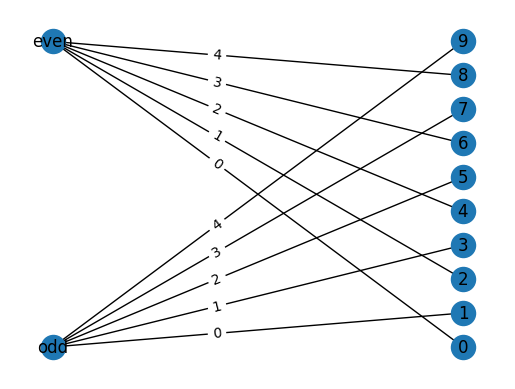

In [ ]:
import matplotlib.pyplot as plt

# layout задает расположение вершин на картинке
# есть несколько встроенных генераторов layout-ов, но можно и задавать их вручную
layout = nx.bipartite_layout(G, ["odd", "even"])

# рисуем граф в соответствии с заданным layout-ом
# по умолчанию draw_networkx отображает вершины и ребра без данных
nx.draw_networkx(G, layout)

# отдельный метод отображает данные в ребрах
# обратите внимание, что layout должен быть один и тот же: иначе всё поедет
nx.draw_networkx_edge_labels(G, pos=layout, label_pos=0.4,
                             edge_labels=nx.get_edge_attributes(G, "quotient"))

plt.axis("off")

## №1. Выращивание деревьев ($2.5$ балла)

Итак, каждый уважающий себя студент ПМИ должен посадить дерево. Как вы помните, деревом называется связный простой граф без циклов.

Научимся генерировать деревья. Воспользуемся следующей идеей: сгенерируем список `degrees` степеней вершин, а по нему построим дерево.

*Задание*: напишите функцию `generate_tree`, которая принимает на вход массив `degrees` (который можно менять), и возвращает `nx.Graph` — дерево в вершинами `0`, `1`, ..., `len(degrees) - 1`, где степень вершины `i` равна `degrees[i]`, либо `None`, если дерева с таким набором степеней не существует. Обоснуйте корректность алгоритма.

In [ ]:
def generate_tree(degrees: list[int]) -> nx.Graph | None:
    leafs = []
    non_leafs = []
    sum_non_leafs = 0
    G = nx.Graph()
    G.add_nodes_from(range(len(degrees)))
    if len(degrees) == 2:
      if degrees[0] == 1 and degrees[1] == 1:
        G.add_edge(0, 1)
        return G
      return None
    if len(degrees) == 1:
      if degrees[0] != 0:
        return None
      return G
    for i in range(len(degrees)):
      if degrees[i] == 1:
        leafs.append(i)
      elif degrees[i] == 0:
        return None
      else:
        non_leafs.append((i, degrees[i]))
        sum_non_leafs += degrees[i]
    if (sum_non_leafs  + len(leafs)) // 2 != len(leafs) + len(non_leafs) - 1:
      return None
    for i in range(len(non_leafs) - 1):
      G.add_edge(non_leafs[i][0], non_leafs[i + 1][0])
      non_leafs[i] = (non_leafs[i][0], non_leafs[i][1] - 1)
      non_leafs[i + 1] = (non_leafs[i + 1][0], non_leafs[i + 1][1] - 1)
    cur_v = 0
    for leaf in leafs:
      while non_leafs[cur_v][1] == 0:
        cur_v += 1
      G.add_edge(leaf, non_leafs[cur_v][0])
      non_leafs[cur_v] = (non_leafs[cur_v][0], non_leafs[cur_v][1] - 1)
    return G

In [ ]:
assert generate_tree([1, 1, 1]) is None
assert generate_tree([0, 1, 1]) is None
assert dict(generate_tree((degrees := [4, 3, 2] + [1] * 5).copy()).degree) \
    == dict(enumerate(degrees))

*Обоснование*: Сначала делим вершинки на листья и не листья. Из всех вершин не листьев должно собраться дерево. А все листья крепятся к не листьям. Мы знаем ограничение на количество ребер (Е = V - 1). Если это ограничение неверно, то дерева не существует. Если же оно верно, то можем построить дерево по следующему алгоритму: сцепляем нелистья в путь (можем, так как у каждого степень хотя бы 2), дальше на свободные позиции прикрепляем листья. Всё сойдётся, потому что выполнено E = V - 1, тогда нам как раз хватит свободных мест для листьев и не останется не заполненных свободных степеней у не листьев.
И еще в начале отдельно обрабатываем случаи, когда вершина одна или две, так как там вообще нет вершин не листьев.


Теперь, используя написанную функцию и модуль `random`, сгенерируйте и визуализируйте построенное дерево. Выделите цветом листовые вершины.

*Hint*: `nx.spring_layout` выглядит красиво :)

Один рандом:

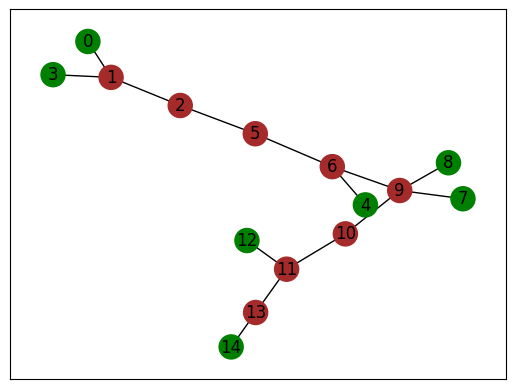

In [ ]:
import random


def random_tree1() -> nx.Graph:
    degrees = [random.randint (1, 4) for _ in range(15)]
    while True:
      tree = generate_tree(degrees)
      if tree is not None:
        return tree
      degrees = [random.randint (1, 4) for _ in range(15)]


tree = random_tree1()
layout = nx.spring_layout(tree)
leaves = [node for node in tree.nodes() if tree.degree(node) == 1]
colors = {node: 'green' for node in leaves}
nx.draw_networkx(tree, layout, node_color=[colors.get(node, 'brown') for node in tree.nodes()])

Другой рандом, генерирует дерево, которое точно существует:


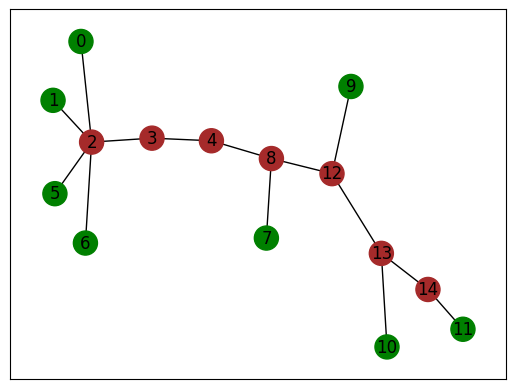

In [ ]:
import random


def random_tree() -> nx.Graph:
    n = 15 #кол-во вершин
    degrees = [1] * n
    for i in range(n - 2):
      degrees[random.randint(0, 14)] += 1
    while True:
      tree = generate_tree(degrees)
      if tree is not None:
        return tree
      degrees = [random.randint (1, 4) for _ in range(15)]


tree = random_tree()
layout = nx.spring_layout(tree)
leaves = [node for node in tree.nodes() if tree.degree(node) == 1]
colors = {node: 'green' for node in leaves}
nx.draw_networkx(tree, layout, node_color=[colors.get(node, 'brown') for node in tree.nodes()])

## №2. Забота о дереве ($2.5$ балла)
Дерево нужно не только посадить, но и вырастить. Для этого за ним нужно ухаживать: укорачивать  ветви.

*Ветвью* в дереве называется простой путь, соединяющий две вершины степени отличной от двух (то есть листья и вершины степени больше 2), в котором все промежуточные вершины имеют степень 2. Другими словами, ветвью называется связный фрагмент дерева, не содержащий ветвления. В этом задании мы хотим *стянуть* все ветви в данном дереве в ребра, то есть каждую ветвь заменить на ребро.

*Задание*: напишите функцию `construct_branch_tree`, которое принимает на вход дерево `tree`, стягивает в нем ветви и возвращает измененное дерево (сам граф копировать не нужно).

In [ ]:
def construct_branch_tree(tree: nx.Graph) -> nx.Graph:
    delet = []
    for node in tree.nodes():
      neigh = list(nx.neighbors(tree, node))
      if tree.degree(node) == 2:
        delet.append(node)
        tree.add_edge(neigh[0], neigh[1])
        tree.remove_edge(neigh[0], node)
        tree.remove_edge(neigh[1], node)
    for node in delet:
      tree.remove_node(node)
    return tree

Визуализируйте результат работы функции: постройте изображение исходного дерева, в котором выделите вершины степени $2$, и изображение полученного дерева. Используя `layout`, сделайте так, чтобы на картинках "до" и "после" вершины со степенями, не отличными от $2$, были на одинаковых местах.

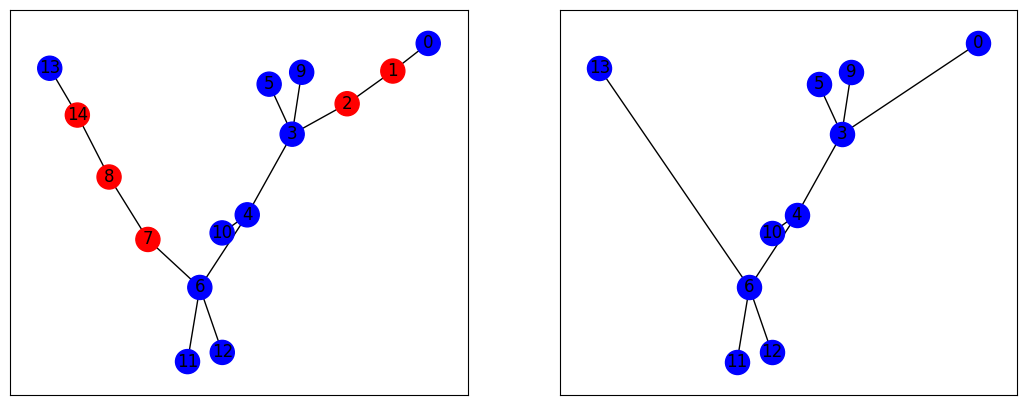

In [ ]:
tree = random_tree()
layout = nx.spring_layout(tree)  # можете заменить на любой layout, который вам нравится


fig, [ax1, ax2] = plt.subplots(1, 2, figsize = [13, 5])

delet = [node for node in tree.nodes() if tree.degree(node) == 2]
colors = {node: 'red' for node in delet}
nx.draw_networkx(tree, layout, node_color=[colors.get(node, 'blue') for node in tree.nodes()], ax = ax1)

new_tree = construct_branch_tree(tree)
nx.draw_networkx(new_tree, layout, node_color='blue', ax = ax2)

#или можем создать новый layout и заменить последний абзац на следующий:
#new_tree = construct_branch_tree(tree)
#layout = nx.spring_layout(new_tree, pos = layout, fixed = tree.nodes())
#nx.draw_networkx(new_tree, layout, node_color='blue', ax = ax2)

## №3. Путешествие ($2.5 + 1$ баллa)
Итак, вы посадили дерево. Однако растет оно долго, и в свободное от ухода за ним (и, конечно же, учебы) время вы решили отправится в путешествие.

Ваше путешествие зключается в том, чтобы обойти все ребра некоторого графа. Времени у вас, однако, не слишком много, и проходить по ребрам по несколько раз вы не хотите. Напомним, что путь в графе, который проходит по всем ребрам по одному разу, называется *эйлеровым*, а сам граф называется *полуэйлеровым*, если в нем есть эйлеров путь.

*Задание*: напишите функцию `generate_semieuler`, которая возвращает какой-нибудь ориентированный полуэйлеров граф на $n$ вершинах с $m$ ребрами, у которого нет двунаправленных ребер, либо `None`, если такого графа не существует. Обоснуйте корректность алгоритма.

In [ ]:
def generate_semieuler(n: int, m: int) -> nx.Graph | None:
    if n % 2 == 1 and m > n * (n - 1) // 2:
      return None
    if n % 2 == 0 and m > n * (n - 1) // 2 - (n // 2 - 1):
      return None
    G = nx.complete_graph(n)
    if n % 2 == 0:
      for i in range(n//2 - 1):
        G.remove_edge(i, n - i - 1)
    counter = 0
    G_ans = nx.DiGraph()
    G_ans.add_nodes_from(range(n))
    for edge in nx.eulerian_path(G, source=n//2):
      counter += 1
      G_ans.add_edge(edge[0], edge[1])
      if counter == m:
        break
    return G_ans

*Обоснование*: Сначала создадим почти полный граф так, чтобы степени всех вершин, кроме может быть двух, были четными. Заметим, что если m больше количества ребер в этом графе, то эйлерова пути не существует, так как если существует эйлеров путь, то в графе будет 0 или 2 нечетных вершины -- а с таким ограничением ребер больше не может быть, чем у нас. Далее строим эйлеров путь и берем его префикс длины m (в определении, данном в условии, не прописано, что граф должен быть связным, так что связность гарантировать не обязательно).

Визуализируйте полученный граф и эйлеров путь в нем: отметьте концы пути и раскрасьте ребра таким образом, чтобы цвет плавно менялся вдоль пути.

*Дополнительный балл*: за красивую (по мнению проверяющего) визуализацию можно получить дополнительный балл.

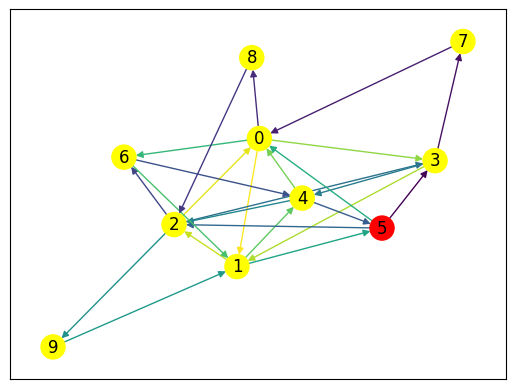

In [ ]:
G = generate_semieuler(10, 25)

layout = nx.spring_layout(G)
colors = dict()
i = 1
for edge in nx.eulerian_path(G, source=len(G.nodes())//2):
  colors[edge] = i
  i += 1
nx.draw_networkx(G, layout, edge_color=[colors.get(edge) for edge in G.edges()], node_color = ['red' if node == len(G.nodes())//2 else 'yellow' for node in G.nodes()])

## №4. Нужно больше красок! ($2.5 + 1$ баллa)
Вернувшись из путешествия, вы решили заняться строительством и покраской дома.

Так уж вышло, что ваш дом — это простой граф, где комнаты — это вершины. Чтобы дом не казался скучным, вы решили покрасить его так, чтобы у смежных вершин цвета были разными. Однако слишком много цветов вы тоже не хотите: все-таки краску покупать дешевле оптом. Поэтому раскраска должна быть минимальной.

Для проектирования дома вы наняли архитектора Мычельского. Изначально вы хотели сделать ваш дом в форме посаженного ранее дерева, однако г-н Мычельский указал на то, что тогда для покраски комнат хватит всего двух цветов, и предложил взять мычельскиан вашего дерева, причем в несколько итераций: т.е. взять мычельскиан мычельскиана ... мычельскиана вашего дерева. Вы согласились, и теперь вам придется придумать, как покрасить комнаты.

*Задание*: напишите функцию `mycielskian_coloring`, которая принимает на вход дерево `tree` c вершинами `0`, `1`, ..., `len(tree.nodes) - 1` и количество итераций `iterations`, и возвращает граф, получаемый взятием мычельскиана от `tree` `iterations` раз, в каждой вершине которого храниться целочисленный аттрибут `color`, задающий минимальную правильную раскраску на полученном графе.

In [ ]:
def mycielskian_coloring(tree: nx.Graph, iterations: int) -> nx.Graph:
    # your code goes here
    pass

In [ ]:
G = mycielskian_coloring(random_tree(), iters := 3)
assert all(G.nodes[v]['color'] != G.nodes[u]['color'] for u, v in G.edges)

Используя написанную функцию, визуализируйте полученый граф `G` и его минимальную правильную раскраску.

*Дополнительный балл*: за красивую (по мнению проверяющего) визуализацию можно получить дополнительный балл.

In [ ]:
# your code goes here